<a href="https://colab.research.google.com/github/yiranlus/Ankia-Theme/blob/main/12.%20Machine%20Learning/ML2%20-%20Classification%20et%20Clustering/ML2.2_ensemble_methods_intro/notebooks/EnsembleLearning_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
from matplotlib import rcParams
import matplotlib.pyplot as plt

In [62]:
# @title [Optional] Enable sklearnex acceleration on Intel CPU
! python -m pip install scikit-learn-intelex --quiet

try:
    from sklearnex import patch_sklearn
    patch_sklearn()
except:
    pass

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 MB 7.1 MB/s eta 0:00:00


Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


# Introduction to Ensemble Methods

Ensemble methods are techniques for obtaining better predictive performances by using multiple models.

To get an overview of the methods we are going to see today, you can watch this video of Machine learnia about Ensemble learning : https://www.youtube.com/watch?v=7C_YpudYtw8 (you don't need to understand everything before beginning the notebook ;)).

The following dataset comes from a bank which would like to know when a new client arrives if this client will subscribe to a long term deposit.

The bank will be considered as your client in the following parts.

---

**Feel free to create sklearn Pipelines for simplifying the following experiments**

## Introducing and exploring the dataset

The dataset is located in `../data/bank-full.csv`. It has 17 columns, the target column or $ŷ$ is the column named `y`.

In [2]:
# @title Download Dataset
from google.colab import userdata
GITHUB_TOKEN = userdata.get('pat-gh')

DATA_PATH = "12.%20Machine%20Learning/ML2%20-%20Classification%20et%20Clustering/ML2.2_ensemble_methods_intro/data/bank-full.csv"
LOCAL_PATH = "./data/bank-full.csv"

!mkdir ./data
!curl -s -L \
  -H "Accept: application/vnd.github.v3.raw" \
  -H "Authorization: Bearer {GITHUB_TOKEN}" \
  -H "X-GitHub-Api-Version: 2022-11-28" \
  "https://api.github.com/repos/yiranlus/CampusNumerique/contents/{DATA_PATH}" \
  -o "{LOCAL_PATH}"

![ -e "{LOCAL_PATH}" ] && echo "Dataset downloaded"

mkdir: cannot create directory ‘./data’: File exists
Dataset downloaded


Columns summary  :

| column name | simple description |
|-------------|------------------------|
| age | age |
| job | type of job |
| marital | marital status |
| education | education level |
| default | has credit in default? |
| balance | average yearly balance, in euros  |
| housing | has housing loan? |
| loan | has personal loan? |
| contact | contact communication |
| month | last contact month of year |
| day_of_week | last contact day of the week |
| duration |  last contact duration in seconds |
| campaign |  number of contacts performed during campaign for this client |
| pday | number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted) |
| previous | number of contacts performed before this campaign and for this client |
| poutcome | outcome of the previous marketing campaign |
| **output :** |  |
| y | has  the client subscribed a term deposit? |

Let's explore the dataset a bit using pandas.

While exploring the dataset it is recommended to create a list of categorical features

In [3]:
import pandas as pd

Create a dataframe with the dataset `../data/bank-full.csv`

In [26]:
# code here
df = pd.read_csv("./data/bank-full.csv", delimiter=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Describe the dataset informations

In [27]:
# code here
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Use histogramms to display the features' distribution

/tmp/ipython-input-2744948981.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


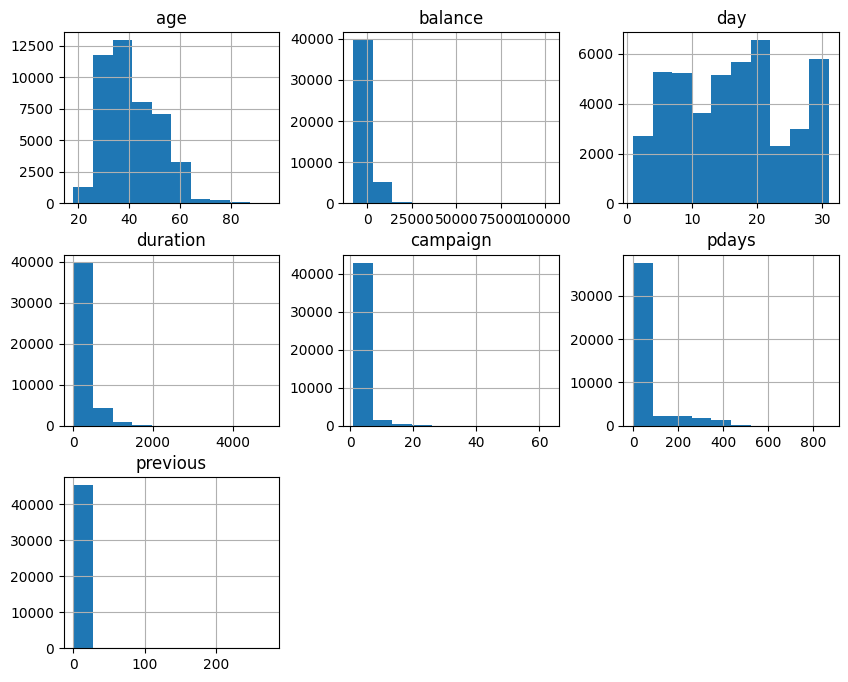

In [28]:
# code here
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()
df.hist(ax=ax)

plt.show()

Use heatmap to display the numerical features' correlation

<Axes: >

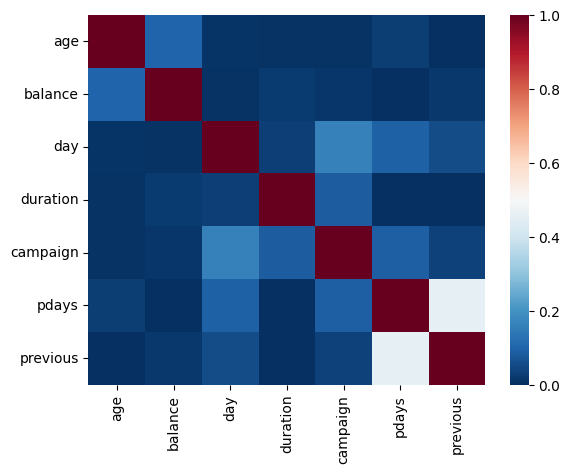

In [29]:
# code here
import seaborn as sns
sns.heatmap(df.select_dtypes("number").corr().abs(), vmin=0, vmax=1, cmap="RdBu_r")

Hop hop hop!!! Not to fast!! Before processing data for machine learning, do you think that all the data are useful?  
As an expert, I tell you you should removed the duration column!!

Could you tell me why?

**Normally, longer calls usually mean client can have subscribed to a term.**

💡*think first, but if you have no idea double click here.*
<!-- When do your calls last the most? -->

In [30]:
# remove duration column
df.drop(columns=["duration"], inplace=True)

The date is a strange type of data for machine learning. Think about it. Is the day? the month? the year that are important? Or the relative date for instance in the year?

If the phenomenon occurs seasonally, maybe it is better to look at the day of the year (on 365 days), if it monthly, maybe to look at the day in the month (on approximativally 30, 31 or other for bissextile year), etc... If more complex, well do the proper hypothesis and test it.

For our problem, we supposed it is better to look at the day of the year. Maybe it is a good hypothesis, maybe not. It is an hypothesis we want you to test. So in order to continue the preprocessing, the features `day` and `month` should be merged into one column named `dayoftheyear`.

You can use pandas datetime tools or python **datetime** librairies for doing this preprocessing. To find the the day of year, look as *dayofyear* method from **datetime** library and examples such as https://pythonguides.com/extract-day-number-of-the-year-from-a-date-in-python/ or https://docs.lucee.org/reference/functions/dayofyear.html
(the default year used will be 1984)

In [31]:
#code here
# You can concatenate multiple Series containing string by just summing them.
# However, be sure each Serie contains string, in case use .astype(str)
from datetime import datetime
dayoftheyear = ("1984 " +
                df["month"].astype(str) + " " +
                df["day"].astype(str)).apply(
                    lambda x: datetime.strptime(x, "%Y %b %d")
                ).dt.day_of_year
df['dayoftheyear'] = dayoftheyear

We cannot treat the same way categories with numerical features. So let's make two different lists and different treatments.

Now sort the features into categorical and numerical features

In [32]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y,dayoftheyear
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no,126
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no,126
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no,126
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no,126
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,3,-1,0,unknown,yes,322
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,2,-1,0,unknown,yes,322
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,5,184,3,success,yes,322
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,4,-1,0,unknown,no,322


In [33]:
categorical_features = ["job", "marital", "education", "default", "housing", "loan", "contact", "poutcome"] # to be completed
ordinal_features = ["default", "housing", "loan"] # "yes" or "no"
numerical_features = ["age", "balance", "campaign", "pdays", "dayoftheyear","previous"]# to be completed

After a first exploration, categorical/ordinal features (8 columns) need to be encoded in order to become a valid input for the modeling phase. ML manipulates figures, not string, not category by itself.

Look at the encoder to *encode* your *categorical data*. The different encoders can be found [here](https://scikit-learn.org/stable/api/sklearn.preprocessing.html).

(You can also use the function `get_dummies` of pandas for categorical features)

In [34]:
# Create the X and y DataFrames resample the dataframes if necessary
from sklearn.preprocessing import LabelEncoder
# X = pd.get_dummies(df, columns=categorical_features) # + numerical_features
X = df[categorical_features + numerical_features]

y_lbl_enc = LabelEncoder()
y = y_lbl_enc.fit_transform(df["y"])
print("y labels:", y_lbl_enc.classes_)
print("y labels:", list(range(len(y_lbl_enc.classes_))))

# train_test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=93875, stratify=y)

y labels: ['no' 'yes']
y labels: [0, 1]


In [35]:
# import and create the appropriate transformers
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

preprocessor = ColumnTransformer([
    ("oht_enc", OneHotEncoder(), [i for i in categorical_features if i not in ordinal_features]),
    ("ord_enc", OrdinalEncoder(), ordinal_features),
    ("std_scl", StandardScaler(), numerical_features)
])

preprocessor.fit(X_train)

ColumnTransformer(transformers=[('oht_enc', OneHotEncoder(),
                                 ['job', 'marital', 'education', 'contact',
                                  'poutcome']),
                                ('ord_enc', OrdinalEncoder(),
                                 ['default', 'housing', 'loan']),
                                ('std_scl', StandardScaler(),
                                 ['age', 'balance', 'campaign', 'pdays',
                                  'dayoftheyear', 'previous'])])

At the end of this part, two dataframes are created :

- `X` containing the features (or the matrix $X$)
- `y` containing the label (or $ŷ$)

Well done! The data is now ready to be splitted into sets and used to train models!

## Modelling phase

The client needs two features :

1. A model, which can be updated without performance loss. In other word, it means a pipeline easy to use and evaluate.
2. A model, that performs well.

### Dummy Classifier

It is always a good idea to begin with a dummy model as a baseline

In [225]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, accuracy_score, average_precision_score, auc

# Code here to get dummy classifier F1score and accuracy
dummy_model = Pipeline([
    ("prp", preprocessor),
    ("clf", DummyClassifier(strategy="prior")) # the data is imbalanced
])
dummy_model.fit(X_train, y_train)

y_test_pred = dummy_model.predict(X_test)
print("F1 score:", f1_score(y_test, y_test_pred))
print("Average precision:", average_precision_score(y_test, y_test_pred))
print("Accuracy score:", accuracy_score(y_test, y_test_pred))

F1 score: 0.0
Average precision: 0.1169600990887375
Accuracy score: 0.8830399009112625


### Simple Decision Tree

We will experiment both feature by doing the two following steps.

* Training the Decision Tree model with various splits of the dataset (change the `seed` parameter of the `train_test_split` function for obtaining the second dataset)
* The decision tree `max_depth` will be fixed at 3 first

if you need more info you can take a look at the [sklearn decision tree doc](https://scikit-learn.org/stable/modules/tree.html).

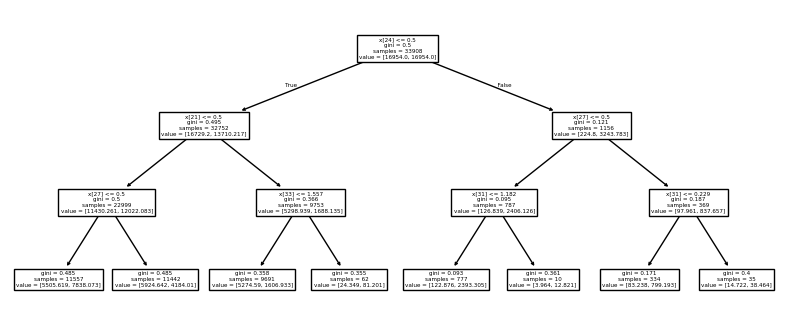

In [37]:
# Decision tree model creation and tree visualization
from sklearn.tree import DecisionTreeClassifier
dt_clf = Pipeline([
    ("prp", preprocessor),
    ("clf", DecisionTreeClassifier(max_depth=3, class_weight='balanced'))
])

dt_clf.fit(X_train, y_train)

from sklearn.tree import plot_tree

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot()
plot_tree(dt_clf.named_steps["clf"], ax=ax)

plt.show()

Now, a first model has been created, change the random seed for the train/test split, and create another tree.

This tree should be created with the same hyperparameters than above.

In [43]:
# create a new train and test dataset with a different seed
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, random_state=12875, stratify=y)

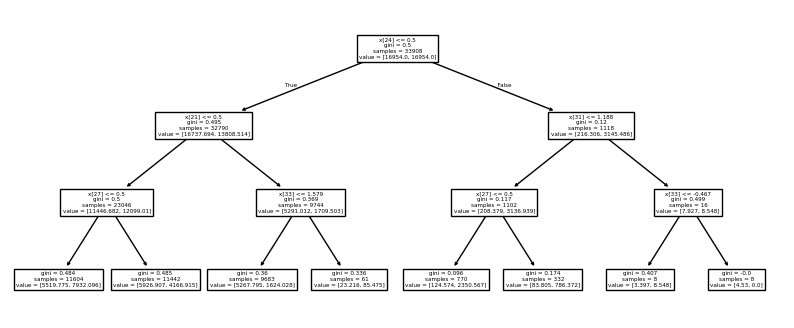

In [44]:
# Second tree creation
dt_clf2 = Pipeline([
    ("prp", preprocessor),
    ("clf", DecisionTreeClassifier(max_depth=3, class_weight='balanced'))
])

dt_clf2.fit(X_train2, y_train2)

from sklearn.tree import plot_tree

fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot()
plot_tree(dt_clf2.named_steps["clf"], ax=ax)

plt.show()

What can you tell about the two trees?

**The two tree have some node that are different, especially when come to the leaf nodes.**

Normally, before creating a model, one or more evaluation metrics should be chosen depending on the client problem.

* Choose different metrics that seem relevant to this problem (see previous lesson on Classification)

* Prepare a scoring list for these metrics.

* Use the cross-validation method to measure these metrics (if you need see : [cross validation sklearn](https://scikit-learn.org/stable/modules/cross_validation.html)).

*Hint:*  the `cross_validate` method allows you to pass a metric list as parameter (see [doc here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) ).

<Axes: xlabel='y'>

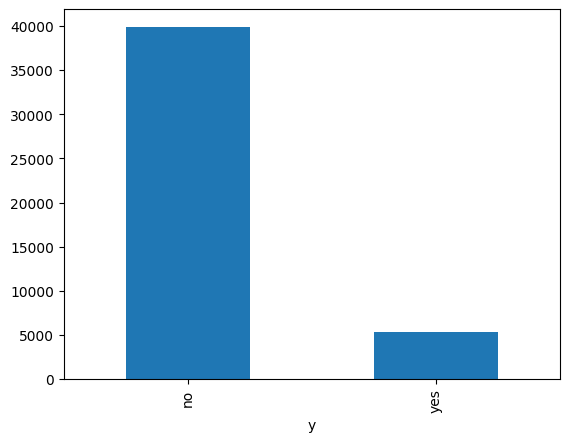

In [45]:
# Test if the target is balanced
df["y"].value_counts().plot.bar()

In [82]:
# Cross validation on Decision trees
from sklearn.model_selection import cross_validate
metrics = ["f1", "average_precision", "precision"]

scores = cross_validate(dt_clf, X_train, y_train, cv=5, scoring=metrics)

import numpy as np

for metric in metrics:
    _metric_key = f"test_{metric}"
    print(f"{metric}:\n", scores[_metric_key])
    print("Mean:", np.mean(scores[_metric_key]))
    print("std:", np.std(scores[_metric_key]))
    print()

f1:
 [0.31954436 0.318387   0.30506443 0.31666173 0.29704742]
Mean: 0.3113409895594034
std: 0.008819901118465935

average_precision:
 [0.2696891  0.30498411 0.26382847 0.28304423 0.26730047]
Mean: 0.27776927596935463
std: 0.015084452034041455

precision:
 [0.20959497 0.20917359 0.20015729 0.20688322 0.19453125]
Mean: 0.20406806296615296
std: 0.0058443654634434215



Now process the output of your cross-validation in order to know the diversity in performances and the average performance

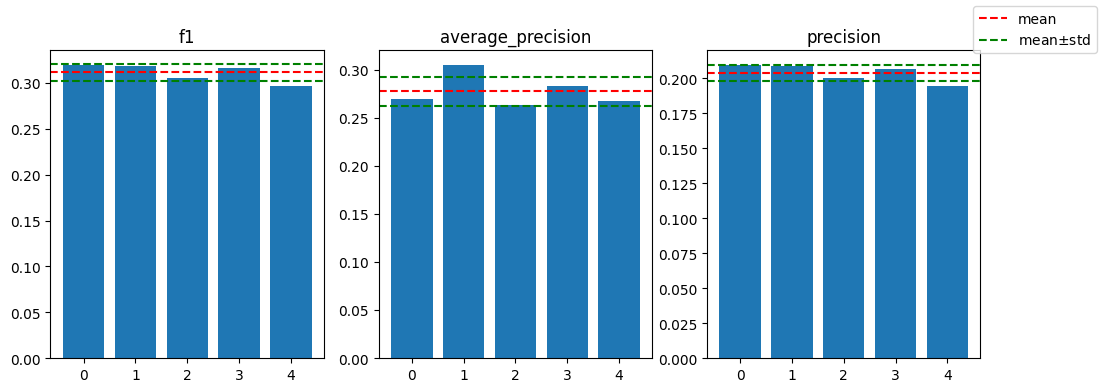

In [84]:
# BONUS: performance plot
# Create a bar plot showing the mean and the standard deviation for each metric
fig, axs = plt.subplots(nrows=1, ncols=len(metrics), figsize=(12, 4))
_axs = axs.flatten()

import numpy as np


has_label = False
for (i, metric) in enumerate(metrics):
    _metric_key = f"test_{metric}"
    _axs[i].bar(range(len(scores[_metric_key])), scores[_metric_key])
    _axs[i].set_title(metric)
    _axs[i].axhline(np.mean(scores[_metric_key]), color="r", linestyle="--")
    _axs[i].axhline(np.mean(scores[_metric_key]) + np.std(scores[_metric_key]), color="g", linestyle="--")
    _axs[i].axhline(np.mean(scores[_metric_key]) - np.std(scores[_metric_key]), color="g", linestyle="--")
fig.legend(["mean", r"mean$\pm$std"])
plt.show()

Now choose a single metric to perform a grid search on the `max_depth` of the tree.

In [ ]:
# Grid search
param_grid = {
    "clf__max_depth": range(3, 100)
}

from sklearn.model_selection import GridSearchCV
grid_search_dt = GridSearchCV(dt_clf, param_grid, scoring="average_precision", cv=5, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

print("Best parameters:", grid_search_dt.best_params_)

Best parameters: {'clf__max_depth': 8}


In [ ]:
grid_search_dt.best_score_

np.float64(0.39907873606162114)

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [52]:
# Test metrics
dt_clf_best = Pipeline([
    ("prp", preprocessor),
    ("clf", DecisionTreeClassifier(max_depth=8, class_weight="balanced"))
])

dt_clf_best.fit(X_train, y_train)
y_test_pred_proba = dt_clf_best.predict_proba(X_test)[:, 1]

from sklearn.metrics import average_precision_score
print("Average precision:", average_precision_score(y_test, y_test_pred_proba))

Average precision: 0.3725312897694217


What are your observation?  
By looking at the metric results, what is strange? Or at the opposite, obvious?

**The average precision (AP) compared to the dummy model has improved a lot. However, the precision depends on the threshold and its value is rather low.**

From theses observations, what are your conclusions?

**The Decision Tree model has increase the ability to predict the good values. and the model is rather stable.**

In the next sessions, we will look at ensembling to improve performances. But what should you be suspicious? What are the potential risks you identified?

**Ensembling is also based on decision tree. They could result in same metrics.**

Propose something, continue to the next section and change your conclusions if you need.

### Introducing Ensemble Learning with Bagging models.

Let's train multiple classifiers in parallel in a bootstraping approach!

Bagging stands for ***Boostrap AGGregatING***.

The following [post](https://blog.octo.com/les-methodes-ensemblistes-pour-algorithmes-de-machine-learning/) will give you an overview of these methods and their advantages and drawbacks

**The train test split using a seed equals to 42 will be used in the following part**

In [89]:
# train_test split (you can copy paste the previously declared cell)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [90]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = Pipeline([
    ("prp", preprocessor),
    ("clf", RandomForestClassifier(class_weight="balanced"))
])

rf_clf.fit(X_train, y_train)
y_test_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

from sklearn.metrics import precision_score, recall_score
threshold = 0.5

from sklearn.metrics import average_precision_score, f1_score
print("average precision:", average_precision_score(y_test, y_test_pred_proba))
print("F1 precision:", f1_score(y_test, y_test_pred_proba > threshold))
print("Precision:", precision_score(y_test, y_test_pred_proba > threshold))
print("Recall:", recall_score(y_test, y_test_pred_proba > threshold))

average precision: 0.43102538569994886
F1 precision: 0.385747813100064
Precision: 0.2686478454680535
Recall: 0.6838124054462935


#### Using Random Forest

The concept of random forest is explained in this [post](https://medium.com/analytics-vidhya/understanding-the-random-forest-algorithm-79b87bdde79a).

Now the best parameters of the previous classifier will be used in a using a bagging classifier
[sklearn : Random Forest Doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier)

We will use grid search on the `n_estimators` and `max_depth` parameters.

In [99]:
# gridsearch for the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = Pipeline([
    ("prp", preprocessor),
    ("clf", RandomForestClassifier(class_weight="balanced"))
])

from sklearn.model_selection import GridSearchCV
param_grid = {
    "clf__n_estimators": range(110, 120),
    "clf__max_depth": [10], #range(5, 11)
}

grid_search_rf = GridSearchCV(rf_clf, param_grid, cv=5, scoring="average_precision", n_jobs=-1, verbose=5)
grid_search_rf.fit(X_train, y_train)

print("Best params:", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best params: {'clf__max_depth': 10, 'clf__n_estimators': 114}
Best score:  0.42508287508459963


In [100]:
pd.DataFrame(grid_search_rf.cv_results_).sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__max_depth,param_clf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,3.668197,0.765543,0.173542,0.044349,10,114,"{'clf__max_depth': 10, 'clf__n_estimators': 114}",0.417833,0.427965,0.406301,0.430936,0.442379,0.425083,0.012223,1
9,3.727264,0.726811,0.169055,0.090709,10,119,"{'clf__max_depth': 10, 'clf__n_estimators': 119}",0.416967,0.431629,0.404740,0.427298,0.438776,0.423882,0.011897,2
3,3.341117,0.640972,0.149930,0.027015,10,113,"{'clf__max_depth': 10, 'clf__n_estimators': 113}",0.413426,0.430404,0.404207,0.425279,0.440962,0.422856,0.012864,3
6,3.680894,0.781332,0.144525,0.017078,10,116,"{'clf__max_depth': 10, 'clf__n_estimators': 116}",0.423318,0.428372,0.400325,0.423917,0.437606,0.422708,0.012303,4
5,2.977338,0.043809,0.145060,0.008436,10,115,"{'clf__max_depth': 10, 'clf__n_estimators': 115}",0.419459,0.429462,0.404362,0.423249,0.435591,0.422425,0.010570,5


<Axes: xlabel='param_clf__n_estimators', ylabel='mean_test_score'>

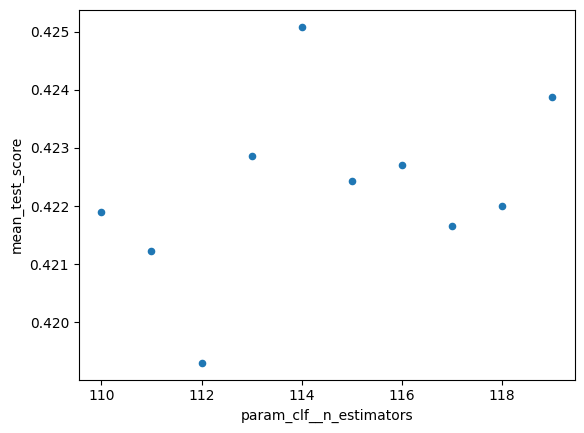

In [101]:
pd.DataFrame(grid_search_rf.cv_results_).plot.scatter(x="param_clf__n_estimators", y="mean_test_score")

<Axes: xlabel='param_clf__n_estimators', ylabel='mean_test_score'>

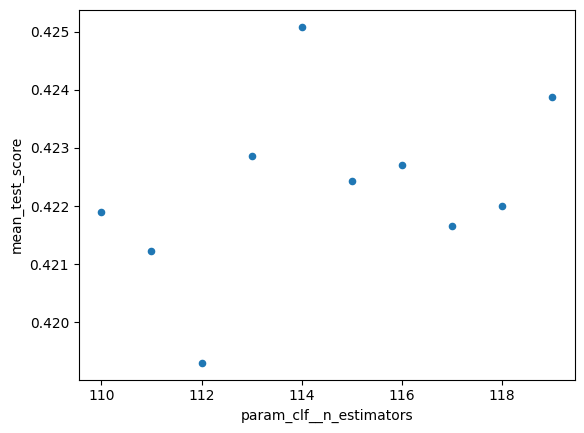

In [102]:
cv_results = pd.DataFrame(grid_search_rf.cv_results_)
cv_results.plot.scatter(x="param_clf__n_estimators", y="mean_test_score")

How much estimators should we use for obtaining an optimal result? (in terms of time and performance)

**At the moment, the best parameters are:**
* `n_estimators`: 114
* `max_depth`: 10

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [103]:
# Test metrics
rf_clf_best = Pipeline([
    ("prp", preprocessor),
    ("clf", RandomForestClassifier(114, max_depth=10, class_weight="balanced"))
])

rf_clf_best.fit(X_train, y_train)
y_test_pred_proba = rf_clf_best.predict_proba(X_test)[:, 1]

from sklearn.metrics import average_precision_score
print("AP:", average_precision_score(y_test, y_test_pred_proba))

AP: 0.44882062860846805


In [104]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_test, y_test_pred_proba > 0.5))
print("Recall:", recall_score(y_test, y_test_pred_proba > 0.5))
print("F1:", f1_score(y_test, y_test_pred_proba > 0.5))

Precision: 0.2799382716049383
Recall: 0.6860816944024206
F1: 0.3976326172731258


#### Other Random Forest effect

The random forest model can attribute an importance value to features, [explanations here](https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e)

Let's train another random forest and display an histogramm with it :

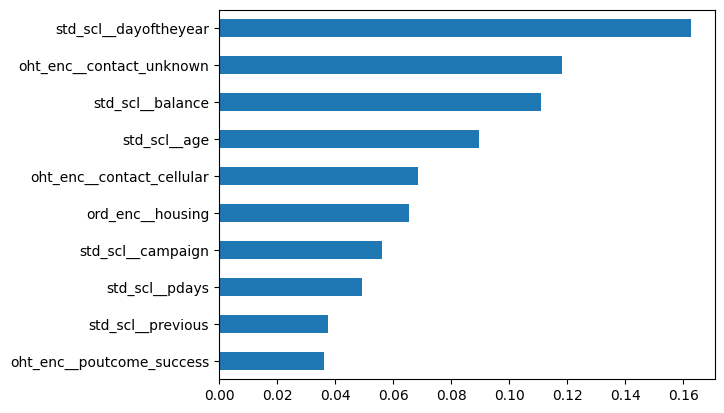

In [105]:
# display features' importance => use the RandomForest Object
importances = pd.Series(
    rf_clf_best.named_steps["clf"].feature_importances_,
    index=preprocessor.get_feature_names_out()
).sort_values(ascending=False)
importances.iloc[:10].plot.barh()
plt.gca().invert_yaxis()

What is the most important feature?

`dayoftheyear`, `age`, `balance`.

A lot of features have low importance and probably add noise which reduce the performance of the classifier, do a feature selection by recursive elemination to automatically select the subset of features that gives you the best model predictions.

You can have a look at :

https://scikit-learn.org/stable/modules/feature_selection.html

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

In [106]:
# Feature selection with recursive elimination
from sklearn.feature_selection import RFECV

# rf_clf_best = Pipeline([
#     ("prp", preprocessor),
#     ("clf", RandomForestClassifier(114, max_depth=10, class_weight="balanced"))
# ])

preprocessor.fit(X_train)

rfecv = RFECV(RandomForestClassifier(114, max_depth=10, class_weight="balanced"), cv=5, scoring="average_precision", n_jobs=-1, verbose=5)
rfecv.fit(preprocessor.fit_transform(X_train), y_train)

Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.


RFECV(cv=5,
      estimator=RandomForestClassifier(class_weight='balanced', max_depth=10,
                                       n_estimators=114),
      n_jobs=-1, scoring='average_precision', verbose=5)

In [107]:
print("Number of features:", rfecv.n_features_)
print("Indices of columns:", [int(x[1:]) for x in rfecv.get_feature_names_out()])
preprocessor.get_feature_names_out()[[int(x[1:]) for x in rfecv.get_feature_names_out()]]

Number of features: 11
Indices of columns: [13, 19, 21, 24, 27, 29, 30, 31, 32, 33, 34]


array(['oht_enc__marital_married', 'oht_enc__contact_cellular',
       'oht_enc__contact_unknown', 'oht_enc__poutcome_success',
       'ord_enc__housing', 'std_scl__age', 'std_scl__balance',
       'std_scl__campaign', 'std_scl__pdays', 'std_scl__dayoftheyear',
       'std_scl__previous'], dtype=object)

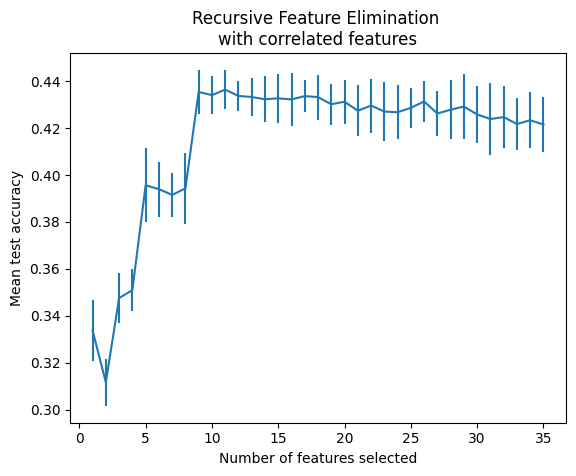

In [109]:
data = {
    key: value
    for key, value in rfecv.cv_results_.items()
    if key in ["n_features", "mean_test_score", "std_test_score"]
}
cv_results = pd.DataFrame(data)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    x=cv_results["n_features"],
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [114]:
# Do another grid search on your model with the subset of selected features
from mlxtend.feature_selection import ColumnSelector

selected_features = ['oht_enc__marital_married', 'oht_enc__contact_cellular',
       'oht_enc__contact_unknown', 'oht_enc__poutcome_success',
       'ord_enc__housing', 'std_scl__age', 'std_scl__balance',
       'std_scl__campaign', 'std_scl__pdays', 'std_scl__dayoftheyear',
       'std_scl__previous']
selected_columns = [13, 19, 21, 24, 27, 29, 30, 31, 32, 33, 34]

preprocessor.fit(X_train)

rf_clf_fs = Pipeline([
    ("prp", preprocessor),
    ("sel", ColumnSelector(selected_columns)),
    ("clf", RandomForestClassifier(class_weight="balanced"))
])

from sklearn.model_selection import GridSearchCV
param_grid = {
    # "clf__n_estimators": range(120, 140, 2),
    "clf__n_estimators": range(110, 130, 2),
    "clf__max_depth": [11], #range(5, 15)
}

grid_search_rf_fs = GridSearchCV(rf_clf_fs, param_grid, cv=5, scoring="average_precision", n_jobs=-1, verbose=5)
grid_search_rf_fs.fit(X_train, y_train)

# print("Best params:", grid_search_rf_fs.best_params_)
# print("Best score: ", grid_search_rf_fs.best_score_)
pd.DataFrame(grid_search_rf_fs.cv_results_).sort_values("rank_test_score").head()

Fitting 5 folds for each of 10 candidates, totalling 50 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__max_depth,param_clf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,3.059219,0.629795,0.171612,0.061377,11,124,"{'clf__max_depth': 11, 'clf__n_estimators': 124}",0.444473,0.444097,0.428127,0.441834,0.433702,0.438447,0.006461,1
4,2.295482,0.025459,0.156295,0.032686,11,118,"{'clf__max_depth': 11, 'clf__n_estimators': 118}",0.436705,0.442331,0.425562,0.441234,0.443177,0.437802,0.006515,2
2,2.296637,0.102887,0.153154,0.032962,11,114,"{'clf__max_depth': 11, 'clf__n_estimators': 114}",0.437298,0.445103,0.420614,0.442789,0.441447,0.437450,0.008792,3
5,2.944345,0.631547,0.172561,0.068274,11,120,"{'clf__max_depth': 11, 'clf__n_estimators': 120}",0.435948,0.439092,0.426631,0.442165,0.439132,0.436593,0.005355,4
9,3.176922,0.850186,0.207927,0.160110,11,128,"{'clf__max_depth': 11, 'clf__n_estimators': 128}",0.437102,0.438332,0.424238,0.440727,0.437334,0.435546,0.005798,5


<Axes: xlabel='param_clf__n_estimators', ylabel='mean_test_score'>

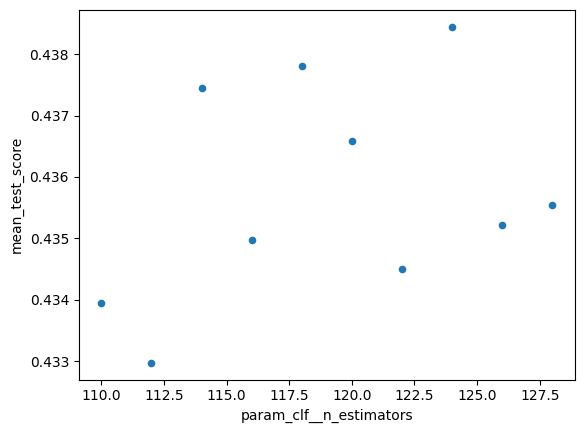

In [115]:
pd.DataFrame(grid_search_rf_fs.cv_results_).plot.scatter(x="param_clf__n_estimators", y="mean_test_score")

In [116]:
print("Best params:", grid_search_rf_fs.best_params_)
print("Best score: ", grid_search_rf_fs.best_score_)

Best params: {'clf__max_depth': 11, 'clf__n_estimators': 124}
Best score:  0.43844651355463976


In [117]:
rf_clf_fs_best = Pipeline([
    ("prp", preprocessor),
    ("sel", ColumnSelector(selected_columns)),
    ("clf", RandomForestClassifier(124, max_depth=11))
])

rf_clf_fs_best.fit(X_train, y_train)

y_test_pred_proba = rf_clf_fs_best.predict_proba(X_test)[:, 1]
print("Average precision:", average_precision_score(y_test, y_test_pred_proba))

Average precision: 0.4637461545151182


We removed the duration feature in our dataset

Read this feature description on the dataset description ([here on data.world](https://data.world/uci/bank-marketing) or [here on kaggle](https://www.kaggle.com/janiobachmann/bank-marketing-dataset)).

How would the previously trained models perform with this feature?



```
# Ce texte est au format code
```

**It improves a lot the metric.**

### Continue Ensemble Learning with boosting techniques

Bagging permits to average the results of separated models, whereas the boosting technique trains a classifier and optimizes it in function of its error.

Some information about boosting techniques are on the [sklearn documentation](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting) but a commonly used library for these techniques is [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html) there are some compatibilities with the sklearn methods (gridsearch, cross validation,...)

- install the `xgboost` package

*Read the articles in resources for a complete explanation.*

In this part a classifier will be trained and evaluated.

In [ ]:
# use the same split and seed than you used before
# normally, you have nothing to code here :D

*Hint:* An example for integrating `XGBoost` with  the `sklearn` tools is available [here](https://medium.com/@juniormiranda_23768/ensemble-methods-tuning-a-xgboost-model-with-scikit-learn-54ff669f988a)

In [118]:
import xgboost as xgb

Let's build a new model than before with a grid search on the `n_estimators` and `max_depth` parameters.

In [165]:
# model building and evaluation
xgb_clf = Pipeline([
    ("prp", preprocessor),
    ("sel", ColumnSelector(selected_columns)),
    ("clf", xgb.XGBRFClassifier())
])

xgb_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

y_test_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]
print("Average precision:", average_precision_score(y_test, y_test_pred_proba))

Average precision: 0.43644139488330536


In [169]:
# gridsearch
from sklearn.model_selection import GridSearchCV
param_grid = {
    "clf__n_estimators": range(129, 140),
    "clf__max_depth": [12]
}

grid_search_xgb = GridSearchCV(xgb_clf, param_grid, cv=5, scoring="average_precision", n_jobs=-1, verbose=5)
grid_search_xgb.fit(X_train, y_train)

print("Best params:", grid_search_xgb.best_params_)
print("Best score: ", grid_search_xgb.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Best params: {'clf__max_depth': 12, 'clf__n_estimators': 130}
Best score:  0.43411691160744714


<Axes: xlabel='param_clf__n_estimators', ylabel='mean_test_score'>

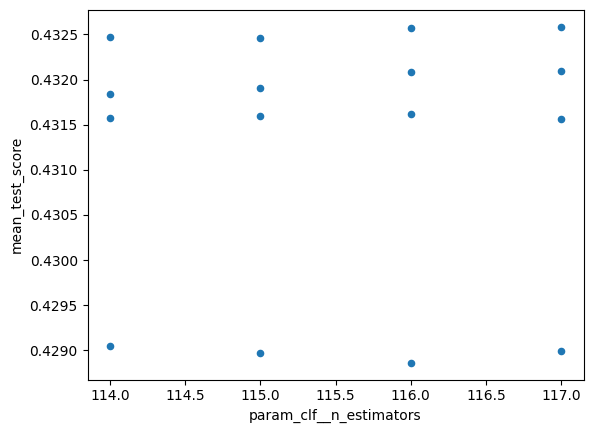

In [129]:
pd.DataFrame(grid_search_xgb.cv_results_).plot.scatter(x="param_clf__n_estimators", y="mean_test_score")

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [170]:
# Test metrics
xgb_clf_best = Pipeline([
    ("prp", preprocessor),
    ("clf", xgb.XGBRFClassifier(n_estimators=130, max_depth=12))
])

xgb_clf_best.fit(X_train, y_train)
y_test_pred_proba = xgb_clf_best.predict_proba(X_test)[:, 1]

from sklearn.metrics import average_precision_score
print("AP:", average_precision_score(y_test, y_test_pred_proba))

AP: 0.46524978165216174


Text(0, 0.5, 'Precision')

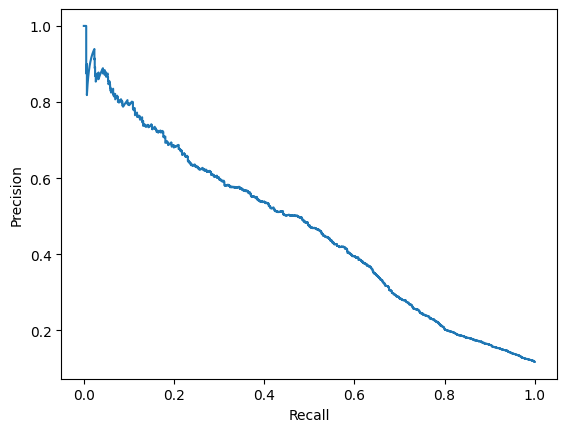

In [171]:
# performance curves
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_test_pred_proba)

plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")

## Let's Conclude

Report your test set metrics for the three methods here

In [172]:
# Decision Tree on test set
y_test_pred_proba_dt = dt_clf_best.predict_proba(X_test)[:, 1]

threshold=0.5
from sklearn.metrics import average_precision_score
print("Precision:", precision_score(y_test, y_test_pred_proba_dt > threshold))
print("Recall:", recall_score(y_test, y_test_pred_proba_dt > threshold))
print("AP:", average_precision_score(y_test, y_test_pred_proba_dt))

Precision: 0.3020014295925661
Recall: 0.6391830559757943
AP: 0.44554955799236173


In [175]:
# Random forest on test set
y_test_pred_proba_rf = rf_clf_fs_best.predict_proba(X_test)[:, 1]

threshold = 0.75
from sklearn.metrics import average_precision_score, precision_score, recall_score
print("Precision:", precision_score(y_test, y_test_pred_proba_rf > threshold))
print("Recall:", recall_score(y_test, y_test_pred_proba_rf > threshold))
print("AP:", average_precision_score(y_test, y_test_pred_proba_rf))

Precision: 0.8571428571428571
Recall: 0.049924357034795766
AP: 0.4637461545151182


In [174]:
# XGBoost on test set
y_test_pred_proba_xgb = xgb_clf_best.predict_proba(X_test)[:, 1]

threshold = 0.7
from sklearn.metrics import average_precision_score
print("Precision:", precision_score(y_test, y_test_pred_proba_xgb > threshold))
print("Recall:", recall_score(y_test, y_test_pred_proba_xgb > threshold))
print("AP:", average_precision_score(y_test, y_test_pred_proba_xgb))

Precision: 0.5781041388518025
Recall: 0.3275340393343419
AP: 0.46524978165216174


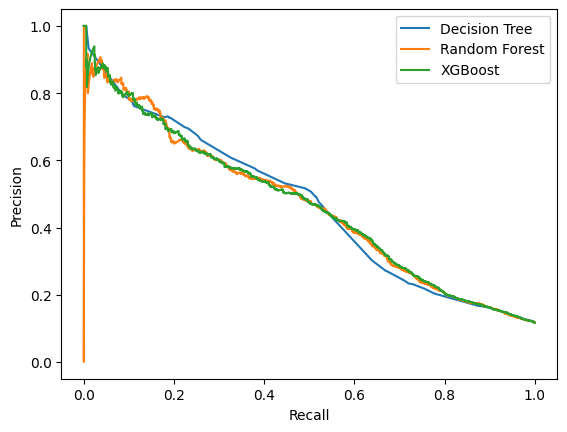

In [231]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, _ = precision_recall_curve(y_test, y_test_pred_proba_dt)
plt.plot(recalls, precisions, label="Decision Tree")
precisions, recalls, _ = precision_recall_curve(y_test, y_test_pred_proba_rf)
plt.plot(recalls, precisions, label="Random Forest")
precisions, recalls, _ = precision_recall_curve(y_test, y_test_pred_proba_xgb)
plt.plot(recalls, precisions, label="XGBoost")

plt.xlabel("Recall")
plt.ylabel("Precision")

plt.legend()
plt.show()

What do you notice? What are you real conclusion about the dataset? What should you tell the client about the dataset and his problem?

**The average precision can be improved a lot by selecting subset of features.**

One problem about the data is that there are a lot of imbalanced between the positive and negative classes. And in order to predict correctly, the threshold should be adjusted to achieve a better precision. And not all the information in the data is strongly relevant.

- Write your memo about bagging and boosting method in a cell below.
- Which model would you choose for the bank, and why? Which precautions?

you can add your models result visualization in this cell if it helps you explaining your conclusions.

**Bagging**:

It uses replacement to build a distinct training subset from sample training data, and majority voting determines the final result. A good example of this is a Random Forest.

The workflow of the bagging method is

1. **Data Sampling**: Create multiple subsets of the training data by sampling with replacement.

2. **Model Training**: Train a separate model on each subset.

3. **Aggregation**: Combine the predictions of all models using methods like averaging (for regression) or voting (for classification).

By averaging the predictions, bagging can reduce variance and can have improve accuracy.

**Boosting**:

Through the creation of sequential models, it transforms poor learners into strong learners, ultimately achieving the highest accuracy. An example of this is ADA BOOST and XGBoost.

The work flow of the boosting method is

1. **Initialize**: Train a weak learner on the entire dataset.

2. **Iterate**: Train subsequent learners, each focusing more on the instances misclassified by previous learners.

3. **Combine**: Aggregate the predictions of all learners, often using weighted voting.

Benefits of the boosting method include reduced bias and high accuracy.

For the bank dataset, the model that can achieve best average precision is XGBoost. XGBBoost also have a better precision.



## To go further

### Build a customized bagging classifier (Optional)

- Use a different classification model you have seen until now and build a new classifier based on the [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier) to create and train an new model.
- Use differents classification models and use the [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) to create and train a new model.

In [204]:
# Write your code here
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC

svc_bag_clf = Pipeline([
    ("prp", preprocessor),
    ("sel", ColumnSelector(selected_columns)),
    ("clf", BaggingClassifier(SVC()))
])
svc_bag_clf.fit(X_train, y_train)

y_test_pred_svc_bag = svc_bag_clf.predict(X_test)

from sklearn.metrics import average_precision_score
print("Precision:", precision_score(y_test, y_test_pred_svc_bag))
print("Recall:", recall_score(y_test, y_test_pred_svc_bag))
print("F1 score:", f1_score(y_test, y_test_pred_svc_bag))
# print("AP:", average_precision_score(y_test, y_test_pred_proba_lin_bag))

Precision: 0.6866096866096866
Recall: 0.18229954614220878
F1 score: 0.2881052002390915


In [200]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC

vot_clf = Pipeline([
    ("prp", preprocessor),
    ("sel", ColumnSelector(selected_columns)),
    ("clf", VotingClassifier([
        ("svc", SVC()),
        ("XGBoost", xgb.XGBClassifier(n_estimators=130, max_depth=12))
    ]))
])
vot_clf.fit(X_train, y_train)

y_test_pred_vot = vot_clf.predict(X_test)

from sklearn.metrics import average_precision_score
print("Precision:", precision_score(y_test, y_test_pred_vot))
print("Recall:", recall_score(y_test, y_test_pred_vot))
print("F1 score:", f1_score(y_test, y_test_pred_vot))
# print("AP:", average_precision_score(y_test, y_test_pred_proba_vot))

Precision: 0.7377622377622378
Recall: 0.15960665658093798
F1 score: 0.26243781094527363


## Rebalance the data if you haven't done it yet

Before going through the modelling phase, let's see the label distribution :

Use the `value_counts` function and the appropriate visualization for displaying the label distribution

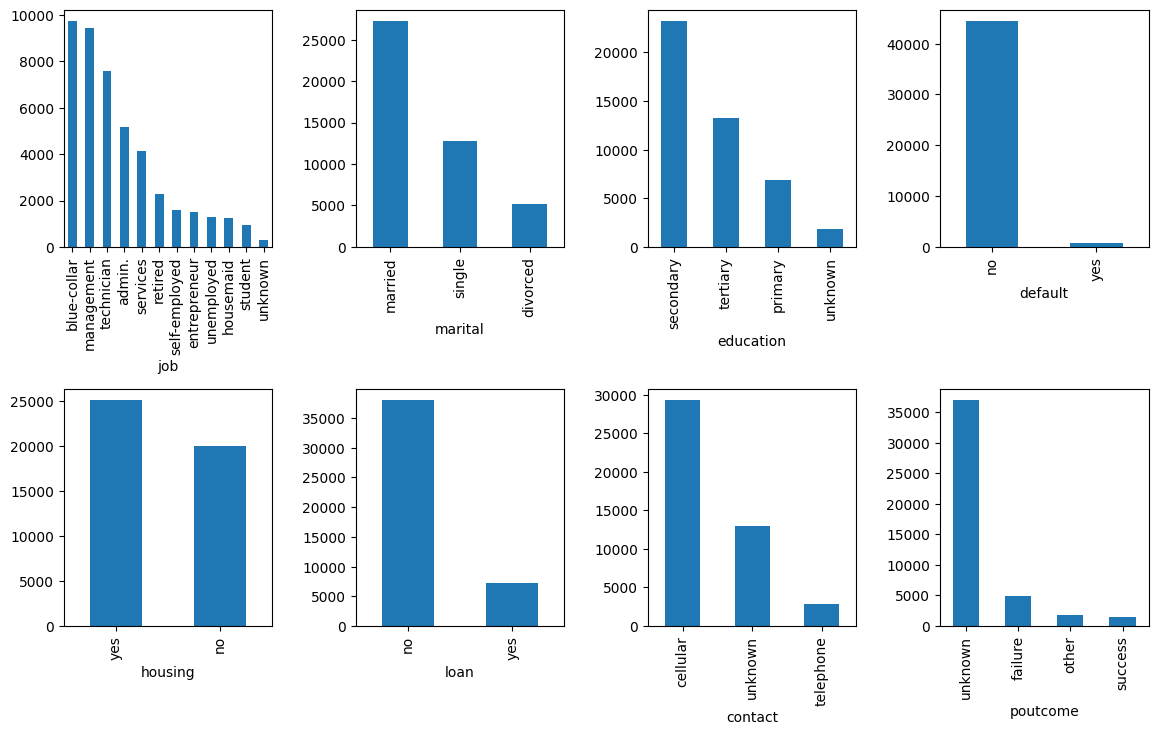

In [221]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(14, 8))
_axs = axs.flatten()

for i, category in enumerate(categorical_features):
    df.value_counts(category).plot.bar(ax=_axs[i])
fig.subplots_adjust(wspace=0.4, hspace=0.6)

plt.show()

What do you notice?

*answer here*

The easiest way to rebalance your data is to add the `class_weight='balanced'` parameter to your scikit learn model. The `class_weight` parameter is available in most scikit-learn models, for example look at the Decision Trees doc :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

(There are other techniques for rebalancing the data [here](https://blog.octo.com/donnees-desequilibrees-que-faire/), [here](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) ).

Rebalance the data with the `class_weight` parameter, and you'll have much better f1 and Average Precision metrics.

In [ ]:
# code here